In [18]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import copy
import math

In [2]:
source_dir = "images/"
save_dir = "save/"

In [3]:
def show_image(image, title=None, save_name=None):
    fig = plt.figure(figsize=(10, 5))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)
    if save_name is not None:
        plt.savefig(save_dir + save_name)
    plt.show()

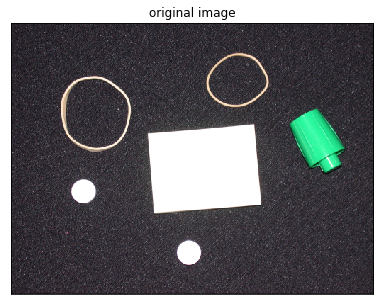

In [4]:
source_image = cv2.imread(source_dir + "shapes.png")
show_image(source_image, "original image")

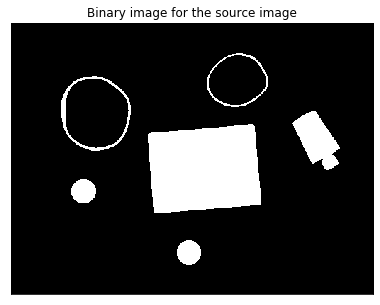

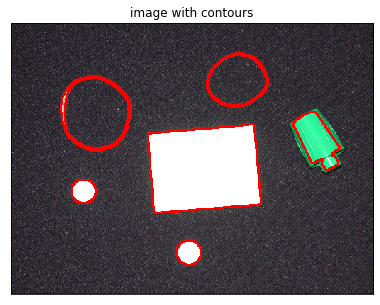

In [51]:
image_with_contours = np.copy(source_image)
grayscale = cv2.cvtColor(source_image, cv2.COLOR_BGR2GRAY)
# smoothed = cv2.medianBlur(grayscale, 5)
smoothed = cv2.bilateralFilter(grayscale, -1, 50, 10)
smoothed = cv2.GaussianBlur(grayscale, (7, 7), 0)
_, thresh = cv2.threshold(smoothed, 10, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show_image(thresh, "Binary image for the source image")
contours, hierarchi = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image_with_contours, contours, -1, (0,0,255), 2)
show_image(image_with_contours, "image with contours")

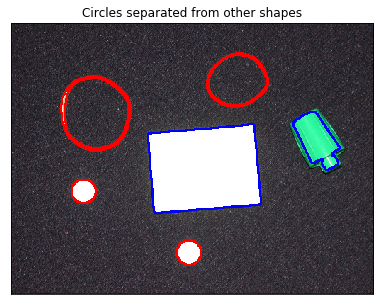

In [57]:
image_with_contours = np.copy(source_image)
for i, contor in enumerate(contours):
    if abs(math.sqrt(cv2.contourArea(contor) / math.pi) - cv2.arcLength(contor, True) / (2 * math.pi)) < 10:
        cv2.drawContours(image_with_contours, contours, i, (0, 0, 255), 2)
    else:
        cv2.drawContours(image_with_contours, contours, i, (255, 0, 0), 2)

show_image(image_with_contours, "Circles separated from other shapes", "4-separated_circles")